# MOM-SIS 0.25$^\circ$

This notebook calculates and retains key diagnostics from our momv5 simulations. The following experiments are included:

| Experiment Name | Description |
|-----------------|-----------------|
|mom025_nyf | Original simulation, rerun from WOA13 initial conditions.|
|mom025_nyf_salt | As above, with new ew salt restoring file from WOA13 surface data. (Not running yet)|

**Last updated May 20 2017.**

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from mpl_toolkits.basemap import Basemap, shiftgrid
import tqdm

In [2]:
from dask.distributed import Client

print('starting distributed client...')
client = Client()
print(client)

starting distributed client...
<Client: scheduler='tcp://127.0.0.1:33756' processes=8 cores=8>


### Experiments

In [3]:
configuration = 'mom025'

expts = cc.get_experiments(configuration)
display(expts)

['mom025_nyf',
 'mom025_nyf_salt',
 'mom025_jra_ryf9091_saltunderice',
 'mom025_jra_ryf8485',
 'mom025_jra_ryf9091',
 'mom025_jra_ryf0304']

In [4]:
expts = expts[:2]
display(expts)

['mom025_nyf', 'mom025_nyf_salt']

## Wind Stress fields
The following code block shows the zonal- and time-averaged (10-year) wind stress forcing for each experiment.

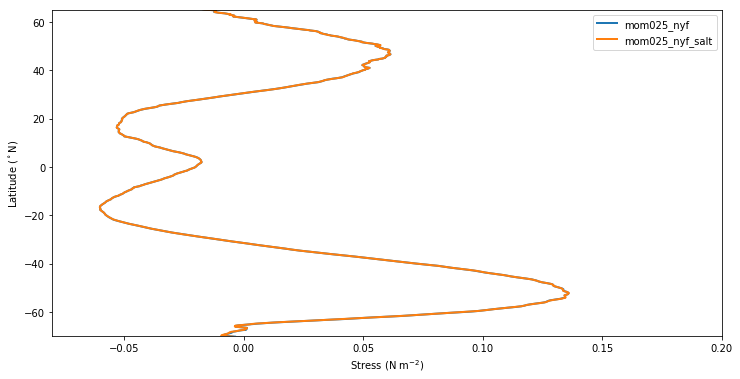

In [5]:
cc.plots.wind_stress(expts)

## Major Transports
In this section, we catalogue and save transport diagnostics from each of the major straits.


In [7]:
straights = {'DrakePassage': [-69.9, -69.9, -71.6, -51.0],
             'Lombok': [-244.6, -243.9, -8.6, -8.6],
             'Ombai' : [-235.0, -235.0, -9.2, -8.1],
             'Timor' : [-235.9, -235.9, -11.9, -9.9],
             'Bering' : [-172, -167, 65.8, 65.8],
             'Denmark' : [-42, -22, 65.8, 65.8],
            }

In [114]:
ty_trans = cc.get_nc_variable(expts[0], 'ocean.nc', 'ty_trans', 
                              time_units='days since 2000-01-01', n=1)
transport = ty_trans.sum('st_ocean').mean('time')
#tx_trans = cc.get_nc_variable(expts[0], 'ocean.nc', 'tx_trans', n=1).sum('st_ocean')

In [1]:
fig, axes = plt.subplots(1, 1, figsize=(16,8))

map = Basemap(projection='mbtfpq', lon_0 = -130, resolution='l', ax=axes)
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')

#map.drawcoastlines(linewidth=0.25)
#map.fillcontinents(color='gray', lake_color='gray')

for straight, coords in straights.items():
    xmin, xmax, ymin, ymax = coords
    map.plot([xmin, xmax], [ymin, ymax], linewidth=4, 
             alpha=0.6,
             color='g', latlon=True)

#X, Y = np.meshgrid(transport.xt_ocean, transport.yu_ocean)
#m = map.pcolormesh(X, Y, transport, latlon=True,
#              vmin=-5, vmax=5)
#cb = map.colorbar(m)
#cb.set_label('Sv')
    
plt.title(ty_trans.long_name)

plt.show()

NameError: name 'plt' is not defined

In [119]:
transport.yu_ocean[463]

<xarray.DataArray 'yu_ocean' ()>
array(-8.468998026287846)
Coordinates:
    yu_ocean  float64 -8.469
Attributes:
    long_name:       ucell latitude
    units:           degrees_N
    cartesian_axis:  Y

In [6]:
# location of Drake Passageand Indonesaian straits. 
# Note that these are approximate -- need careful checking!!
StraightDicts = { 'DrakePassage' :  {'xloc':840,'ymin':110,'ymax':250},
              'Lombok' : {'yloc':463,'xmin':140,'xmax':146},
              'Ombai' : {'xloc':174,'ymin':459,'ymax':465},
              'Timor' : {'xloc':176,'ymin':446,'ymax':460},
            }

In [ ]:
straights = [ {'name': 'DrakePassage', 'xloc':2100,'ymin':225,'ymax':650},
              {'name': 'Lombok', 'yloc':1158,'xmin':354,'xmax':361},
              {'name': 'Ombai', 'xloc':449,'ymin':1152,'ymax':1163},
              {'name': 'Timor', 'xloc':440,'ymin':1125,'ymax':1145},
              {'name': 'Bering', 'yloc':2125,'xmin':1080,'xmax':1130},
              {'name': 'Denmark', 'yloc':2125,'xmin':2380,'xmax':2580},
            ]

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.5/site-packages/xarray/conventions.py:389: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)


[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
1
[########################################] | 100% Completed |  9.2s
2
[########################################] | 100% Completed | 11.3s
3
[########################################] | 100% Completed |  8.7s
4
[########################################] | 100% Completed |  8.9s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
1
[########################################] | 100% Completed |  2.2s
2
[########################################] | 100% Completed |  4.0s
3
[########################################] | 100% Completed |  2.4s
4
[########################################] | 100% Completed |  2.1s


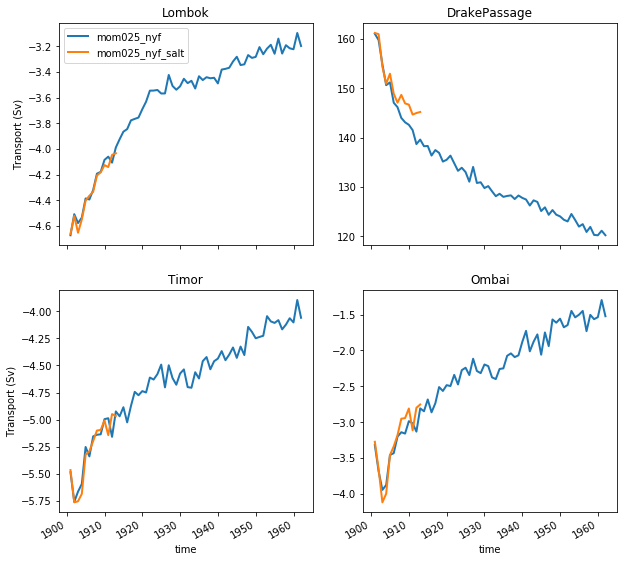

In [7]:
plt.figure(figsize=(10,10))
for expt in expts:
    # Find list of output directories
    ExpDir = os.path.join(DataDir, expt)
    FileList = glob(os.path.join(ExpDir, 'output*/ocean_month.nc'))
    FileList.sort()
    
    dsx = xr.open_mfdataset(FileList, decode_times=False, engine='netcdf4')
    dsx["time"].attrs["units"] = 'days since 1900-01-01'
    dsx = xr.decode_cf(dsx, decode_times=True)
    nplot = 0
    for straight in StraightDicts:
        nplot+=1
        print(nplot)
        
        TransDict = StraightDicts[straight]
        if 'xloc' in TransDict:
            tx_trans = dsx.tx_trans_int_z[:,TransDict['ymin']:TransDict['ymax'],TransDict['xloc']]
            transport = tx_trans.sum('yt_ocean')
            valrange = tx_trans.valid_range[1]
        elif 'yloc' in TransDict:
            ty_trans = dsx.ty_trans_int_z[:,TransDict['yloc'],TransDict['xmin']:TransDict['xmax']]
            transport = ty_trans.sum('xt_ocean')
            valrange = ty_trans.valid_range[1]
        else:
            transport = np.nan
        
        
        plt.subplot(2,2,nplot)
        transport.resample('a',dim='time').plot(label=expt, linewidth=2)
        #transport.plot(label=expt, linewidth=2)
        
        plt.title(straight)

plt.subplot(221)
plt.legend(loc='upper left')
plt.ylabel('Transport (Sv)')
plt.xlabel('')
plt.subplot(222)
plt.ylabel('')
plt.xlabel('')
plt.subplot(223)
plt.ylabel('Transport (Sv)')
plt.subplot(224)
plt.ylabel('')


plt.savefig('figures/Transports.pdf')

## Scalar Quantities
Look at some quantities that are saved in ocean_scalar.nc.

Calculating...done.
Calculating...done.


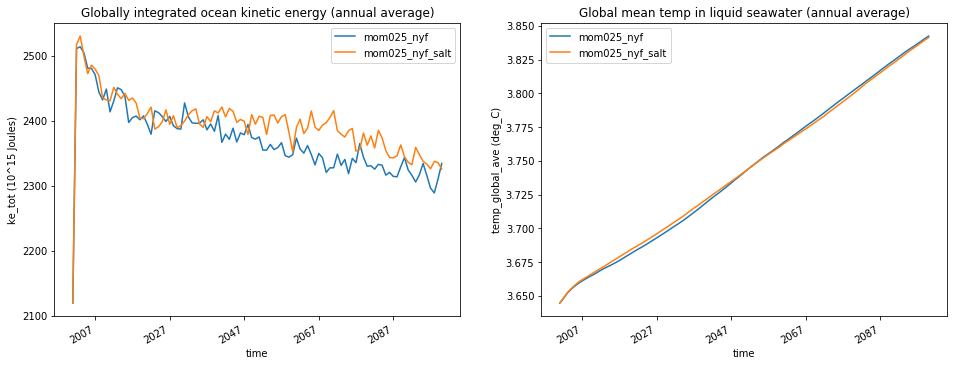

In [6]:
plt.figure(figsize=(16,6))

for i, variable in enumerate(['ke_tot', 'temp_global_ave']):
    plt.subplot(1,2,i+1)
    cc.plots.annual_scalar(expts, variable)
    
plt.show()

## Overturning Circulation
Next, let's look at overturning circulation in density space using ty_trans_rho. We will zonally average this diagnostic, without accounting for the tripolar grid, so ignore the Arctic.

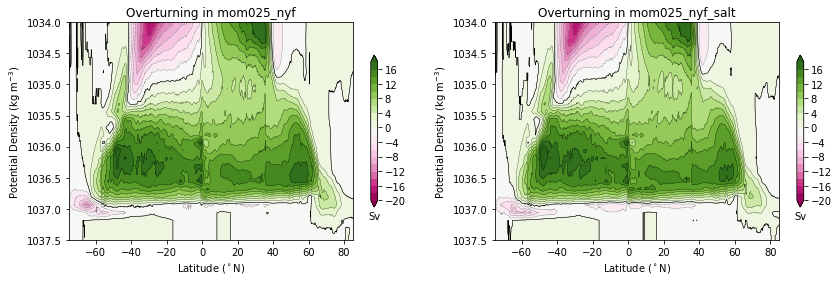

In [7]:
plt.figure(figsize=(14, 4))

for i, expt in enumerate(expts):
    plt.subplot(1, len(expts), i+1)
    cc.plots.psi_avg(expt)

60S
35S
26N
60S
35S
26N


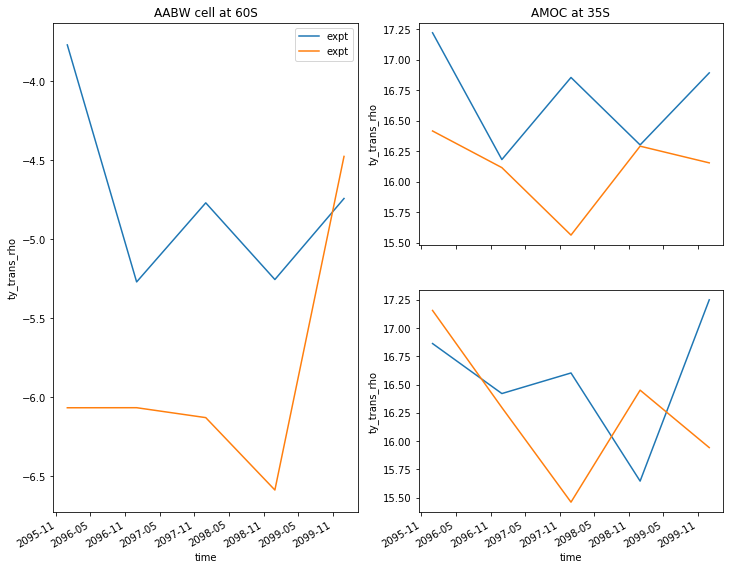

In [7]:
plt.figure( figsize=(12,10))
for expt in expts:

    op = lambda p: p.sum('grid_xt_ocean').cumsum('potrho')

    psi = cc.get_nc_variable(expt, 'ocean.nc', 'ty_trans_rho',
                          op=op,
                          time_units = 'days since 2000-01-01', n=5,
                           )
    print('60S')
    plt.subplot(1,2,1)
    psi.sel(potrho=slice(1036, None), grid_yu_ocean=slice(-60-1, -60+1))\
         .mean('grid_yu_ocean')\
         .min('potrho')\
         .resample('A',dim='time')\
         .plot(label='expt')
    plt.legend()
    plt.title('AABW cell at 60S')
    
    print('35S')
    plt.subplot(2,2,2)

    psi.sel(potrho=slice(1036, None), grid_yu_ocean=slice(-35-1, -35+1))\
         .mean('grid_yu_ocean').max('potrho')\
         .resample('A',dim='time')\
         .plot()
    plt.title('AMOC at 35S')
    
    print('26N')
    plt.subplot(2,2,4)

    psi.sel(potrho=slice(1036, None), grid_yu_ocean=slice(-26-1, -26+1))\
         .mean('grid_yu_ocean')\
         .max('potrho')\
         .resample('A',dim='time')\
         .plot()
    plt.title('AMOC at 26N')

[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


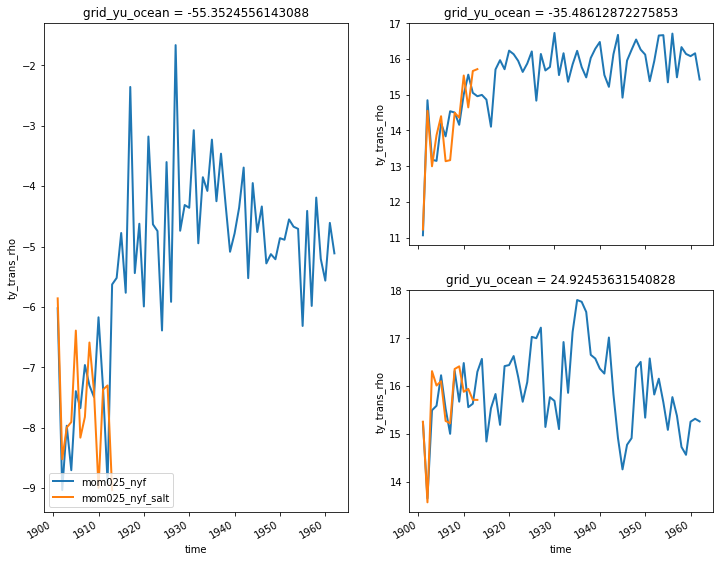

In [14]:
# plot timeseries of overturning
plt.figure(figsize=(12,10))
for expt in expts:
    ExpDir = os.path.join(DataDir, expt)
    FileList = glob(os.path.join(ExpDir, 'output*/overturning.nc'))
    FileList.sort()

    dsx = xr.open_mfdataset(FileList, concat_dim='time',decode_times=False, engine='netcdf4')
    dsx.time.attrs["units"] = 'days since 1900-01-01'
    dsx = xr.decode_cf(dsx, decode_times=True)
    
    plt.subplot(121)
    dsx.ty_trans_rho[:,60:,230].min('potrho').resample('A',dim='time').plot(label=expt,linewidth=2) 
    ## still need to check sensitivity to the exact location in the line above
    
    #Southern branch of the AMOC at 35S
    plt.subplot(222)
    dsx.ty_trans_rho[:,60:,345].max('potrho').resample('A',dim='time').plot(label=expt,linewidth=2) 
    
    # AMOC at 26N
    plt.subplot(224)
    dsx.ty_trans_rho[:,60:,600].max('potrho').resample('A',dim='time').plot(label=expt,linewidth=2) 

#plt.title('AABW cell at 60S')
plt.subplot(121)
plt.legend(loc='lower left')